# Introduction to Pandas

![Pandas logo](https://camo.githubusercontent.com/5cb734f6fc37f645dc900e35559c60d91cc6b550/68747470733a2f2f6465762e70616e6461732e696f2f7374617469632f696d672f70616e6461732e737667)

*"Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language"*

https://pandas.pydata.org

How to get started?

In [1]:
import pandas as pd

In [2]:
pd.__version__

'1.1.1'

Make sure you have the file "hour.csv" in the current directory. If not copy it here or go work there!

In [3]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 5259-21A3

 Directory of C:\Users\catia\Dropbox (UFL)\Teaching\2020 Fall\EEE 4773 Fundamentals of Machine Learning\GitHub\Lectures\Lecture 4a - Feature Engineering & Pandas

09/08/2020  09:38 AM    <DIR>          .
09/08/2020  09:38 AM    <DIR>          ..
09/07/2020  10:48 PM    <DIR>          .ipynb_checkpoints
09/07/2020  11:08 PM            12,836 Feature Engineering.ipynb
01/16/2020  11:24 AM         1,156,736 hour.csv
09/08/2020  09:29 AM           740,569 Introduction to Pandas - prep.ipynb
09/08/2020  09:38 AM            10,899 Introduction to Pandas.ipynb
               4 File(s)      1,921,040 bytes
               3 Dir(s)  801,972,359,168 bytes free


Now let's read the data from the CSV file into a dataframe:

In [4]:
df = pd.read_csv('hour.csv')

## What is a dataframe?

A dataframe is like an Excel spreadsheet within Python:

In [5]:
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


It is a two-dimensional set of data, where the rows and columns can have labels. We can retrieve the data using these labels:

In [6]:
df['weekday']

0        6
1        6
2        6
3        6
4        6
        ..
17374    1
17375    1
17376    1
17377    1
17378    1
Name: weekday, Length: 17379, dtype: int64

Note that a colum  of a dataframe is returned as a pandas series:

In [7]:
type(df['weekday'])

pandas.core.series.Series

A Pandas series is a one-dimensional data object with row labels.

When you import from a CSV file, the column labels are imported, but the row labels are just the numbers of the data rows:

In [8]:
df.loc[1,:]

instant                2
dteday        2011-01-01
season                 1
yr                     0
mnth                   1
hr                     1
holiday                0
weekday                6
workingday             0
weathersit             1
temp                0.22
atemp             0.2727
hum                  0.8
windspeed              0
casual                 8
registered            32
cnt                   40
Name: 1, dtype: object

It is often convenient to use the values in one of the columns as the labels of the rows. We call these the *index* for the rows:

In [9]:
df.set_index('weekday')

,instant,dteday,season,yr,mnth,hr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
weekday,,,,,,,,,,,,,,,,
6,1,2011-01-01,1,0,1,0,0,0,1,0.24,0.2879,0.81,0.0000,3,13,16
6,2,2011-01-01,1,0,1,1,0,0,1,0.22,0.2727,0.80,0.0000,8,32,40
6,3,2011-01-01,1,0,1,2,0,0,1,0.22,0.2727,0.80,0.0000,5,27,32
6,4,2011-01-01,1,0,1,3,0,0,1,0.24,0.2879,0.75,0.0000,3,10,13
6,5,2011-01-01,1,0,1,4,0,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,17375,2012-12-31,1,1,12,19,0,1,2,0.26,0.2576,0.60,0.1642,11,108,119
1,17376,2012-12-31,1,1,12,20,0,1,2,0.26,0.2576,0.60,0.1642,8,81,89
1,17377,2012-12-31,1,1,12,21,0,1,1,0.26,0.2576,0.60,0.1642,7,83,90


Note that that is actually returning a new dataframe and the original dataframe is unchanged:

In [10]:
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


If we wish to work with the original one, we have to replace it

In [11]:
df2 = df.set_index('weekday')

This makes indexing much easier

In [12]:
df2.loc[1,:]

,instant,dteday,season,yr,mnth,hr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
weekday,,,,,,,,,,,,,,,,
1,48,2011-01-03,1,0,1,0,0,1,1,0.22,0.1970,0.44,0.3582,0,5,5
1,49,2011-01-03,1,0,1,1,0,1,1,0.20,0.1667,0.44,0.4179,0,2,2
1,50,2011-01-03,1,0,1,4,0,1,1,0.16,0.1364,0.47,0.3881,0,1,1
1,51,2011-01-03,1,0,1,5,0,1,1,0.16,0.1364,0.47,0.2836,0,3,3
1,52,2011-01-03,1,0,1,6,0,1,1,0.14,0.1061,0.50,0.3881,0,30,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,17375,2012-12-31,1,1,12,19,0,1,2,0.26,0.2576,0.60,0.1642,11,108,119
1,17376,2012-12-31,1,1,12,20,0,1,2,0.26,0.2576,0.60,0.1642,8,81,89
1,17377,2012-12-31,1,1,12,21,0,1,1,0.26,0.2576,0.60,0.1642,7,83,90


Note that the row labels carry over to the Pandas series that is returned by indexing a particular column of the dataframe:

In [13]:
df2['temp']

weekday
6    0.24
6    0.22
6    0.22
6    0.24
6    0.24
     ... 
1    0.26
1    0.26
1    0.26
1    0.26
1    0.26
Name: temp, Length: 17379, dtype: float64

In [14]:
df2['temp'][6]

weekday
6    0.24
6    0.22
6    0.22
6    0.24
6    0.24
     ... 
6    0.30
6    0.30
6    0.28
6    0.26
6    0.26
Name: temp, Length: 2512, dtype: float64

If all we want is the numerical values in the data series, we can convert it to a ```numpy``` array:

In [15]:
df2['temp'].to_numpy()

array([0.24, 0.22, 0.22, ..., 0.26, 0.26, 0.26])

## Creating new Dataframes

**From existent ones**

Suppose that we want to create a dataframe with the columns: "temp", "atemp", "hum", "windspeed", "casual", "registered" and "cnt". We can create it this way:

In [16]:
D = df[['temp','atemp','hum','windspeed','casual','registered','cnt']]

In [17]:
D

,temp,atemp,hum,windspeed,casual,registered,cnt
0,0.24,0.2879,0.81,0.0000,3,13,16
1,0.22,0.2727,0.80,0.0000,8,32,40
2,0.22,0.2727,0.80,0.0000,5,27,32
3,0.24,0.2879,0.75,0.0000,3,10,13
4,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...
17374,0.26,0.2576,0.60,0.1642,11,108,119
17375,0.26,0.2576,0.60,0.1642,8,81,89
17376,0.26,0.2576,0.60,0.1642,7,83,90
17377,0.26,0.2727,0.56,0.1343,13,48,61


In [18]:
D.head(10)

,temp,atemp,hum,windspeed,casual,registered,cnt
0,0.24,0.2879,0.81,0.0000,3,13,16
1,0.22,0.2727,0.80,0.0000,8,32,40
2,0.22,0.2727,0.80,0.0000,5,27,32
3,0.24,0.2879,0.75,0.0000,3,10,13
4,0.24,0.2879,0.75,0.0000,0,1,1
5,0.24,0.2576,0.75,0.0896,0,1,1
6,0.22,0.2727,0.80,0.0000,2,0,2
7,0.20,0.2576,0.86,0.0000,1,2,3
8,0.24,0.2879,0.75,0.0000,1,7,8
9,0.32,0.3485,0.76,0.0000,8,6,14


**From numerical values**

In [19]:
import numpy as np

x = np.linspace(0,1,20)
y = np.sin(2*np.pi*x)
z = np.cos(2*np.pi*x)
t = np.tan(2*np.pi*x)

In [20]:
list_of_tuples = list(zip(x,y,z))
list_of_tuples

[(0.0, 0.0, 1.0),
 (0.05263157894736842, 0.32469946920468346, 0.9458172417006346),
 (0.10526315789473684, 0.6142127126896678, 0.7891405093963936),
 (0.15789473684210525, 0.8371664782625285, 0.5469481581224269),
 (0.21052631578947367, 0.9694002659393304, 0.24548548714079924),
 (0.2631578947368421, 0.9965844930066698, -0.08257934547233227),
 (0.3157894736842105, 0.9157733266550575, -0.40169542465296926),
 (0.3684210526315789, 0.7357239106731317, -0.6772815716257409),
 (0.42105263157894735, 0.4759473930370737, -0.879473751206489),
 (0.47368421052631576, 0.16459459028073403, -0.9863613034027223),
 (0.5263157894736842, -0.16459459028073378, -0.9863613034027224),
 (0.5789473684210527, -0.47594739303707345, -0.8794737512064891),
 (0.631578947368421, -0.7357239106731313, -0.6772815716257414),
 (0.6842105263157894, -0.9157733266550573, -0.40169542465296987),
 (0.7368421052631579, -0.9965844930066698, -0.08257934547233274),
 (0.7894736842105263, -0.9694002659393305, 0.2454854871407988),
 (0.8421

In [21]:
C = pd.DataFrame(list_of_tuples, columns=['Input','Sine','Cosine'])
C

,Input,Sine,Cosine
0,0.000000,0.000000e+00,1.000000
1,0.052632,3.246995e-01,0.945817
2,0.105263,6.142127e-01,0.789141
3,0.157895,8.371665e-01,0.546948
4,0.210526,9.694003e-01,0.245485
5,0.263158,9.965845e-01,-0.082579
6,0.315789,9.157733e-01,-0.401695
7,0.368421,7.357239e-01,-0.677282
8,0.421053,4.759474e-01,-0.879474
9,0.473684,1.645946e-01,-0.986361


In [22]:
C.insert(3,'Tangent',t)

In [23]:
C

,Input,Sine,Cosine,Tangent
0,0.000000,0.000000e+00,1.000000,0.000000e+00
1,0.052632,3.246995e-01,0.945817,3.433004e-01
2,0.105263,6.142127e-01,0.789141,7.783312e-01
3,0.157895,8.371665e-01,0.546948,1.530614e+00
4,0.210526,9.694003e-01,0.245485,3.948911e+00
5,0.263158,9.965845e-01,-0.082579,-1.206821e+01
6,0.315789,9.157733e-01,-0.401695,-2.279770e+00
7,0.368421,7.357239e-01,-0.677282,-1.086290e+00
8,0.421053,4.759474e-01,-0.879474,-5.411729e-01
9,0.473684,1.645946e-01,-0.986361,-1.668705e-01


## Visualization

```pandas``` offers a wide range of plotting functions provided by the ```matplotlib``` library.

For example, to plot the feature "temp", you can:

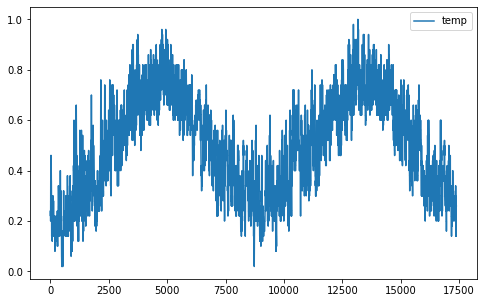

In [24]:
D['temp'].plot(figsize=(8,5), legend=True);

Alternatively, you can pass it directly to ```matplotlib``` functions:

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-colorblind')

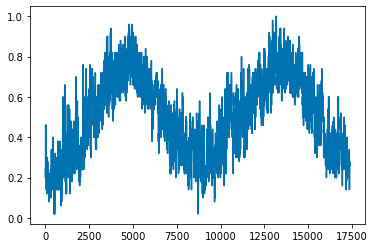

In [26]:
plt.plot(D['temp'])

```pandas``` also includes a plotting module:

In [27]:
import pandas.plotting as pplt

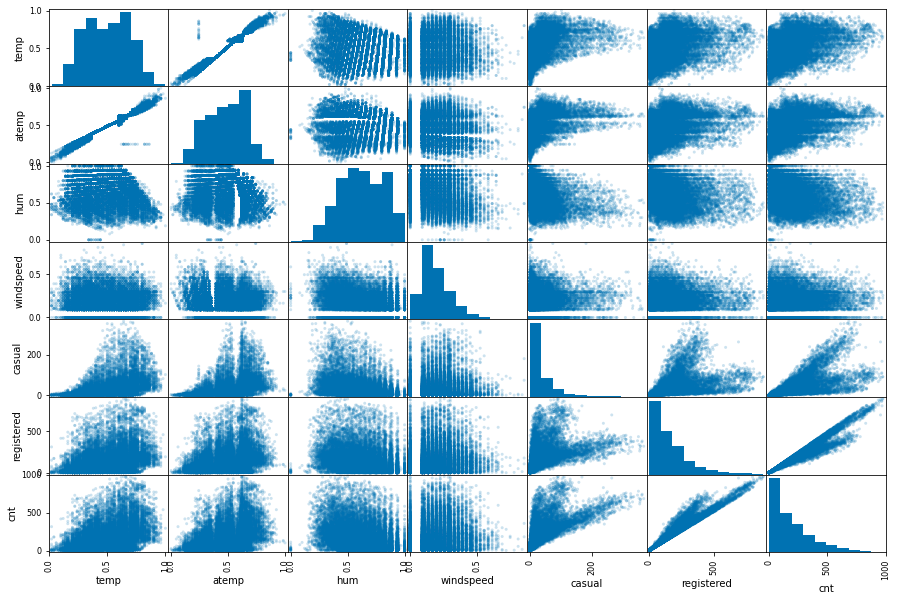

In [28]:
pplt.scatter_matrix(D, alpha=0.2, figsize=(15,10));

## Summary Statistics

In [29]:
D.mean()

temp            0.496987
atemp           0.475775
hum             0.627229
windspeed       0.190098
casual         35.676218
registered    153.786869
cnt           189.463088
dtype: float64

In [30]:
D['temp'].median()

0.5

In [31]:
D[['temp','hum']].std()

temp    0.192556
hum     0.192930
dtype: float64

In [32]:
D.describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [33]:
D.corr()

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929
hum,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321,0.093234
casual,0.459616,0.454080,-0.347028,0.090287,1.000000,0.506618,0.694564
registered,0.335361,0.332559,-0.273933,0.082321,0.506618,1.000000,0.972151
cnt,0.404772,0.400929,-0.322911,0.093234,0.694564,0.972151,1.000000


This covers some basics of working with Pandas dataframes and series, we can begin to work with real data in the next class.

## More Resources

* Read [chapter 3 "Data Manipulation with Pandas"](https://jakevdp.github.io/PythonDataScienceHandbook/index.html) from the book *Python Data Science Handbook* by Jake VanderPlas.

* Watch the [video "pandas in 10 minutes"](https://pandas.pydata.org/getting_started.html) from the pandas *getting started* website

* Read ["10 minutes to pandas"](https://pandas.pydata.org/docs/user_guide/index.html) tutorial series provided in the User Guide documentation website

* Pandas cheat sheet: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf